In [3]:
%matplotlib inline

import matplotlib
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from pprint import pprint
import seaborn as sns

# plt.rcParams['figure.figsize'] = 15, 7

In [2]:
# Reading in Training set from 2011
data_2011 = pd.read_csv('../data/train_master_imputed_dummified.csv')

# Note: The index was copied into a column for some reason? 
# ALSO! We still have DRate Transformed... So I am dropping that too!
data_2011 = data_2011.drop('Unnamed: 0', axis=1)
data_2011 = data_2011.drop('DRate_Transformed', axis=1)

# Setting INSTNAME to index and dropping the UNITID (we can use this later if we want)
data_2011 = data_2011.set_index('INSTNAME')
data_2011 = data_2011.drop('UNITID', axis=1)

In [3]:
data_2011

,GROFFER,HBCU_x,LANDGRNT,PSEFLAG,UGOFFER,Average or Greater than 30,DRate,HBCU_y,HSI,HAS_FTE,...,ICLEVEL_x__3,ICLEVEL_y__1,ICLEVEL_y__2,ICLEVEL_y__3,CONTROL_x__1,CONTROL_x__2,CONTROL_x__3,CONTROL_y__1,CONTROL_y__2,CONTROL_y__3
INSTNAME,,,,,,,,,,,,,,,,,,,,,
Alabama A & M University,1,1,1,1,1,0,16.3,1,0,1,...,0,1,0,0,1,0,0,1,0,0
University of Alabama at Birmingham,1,2,2,1,1,0,8.0,2,0,1,...,0,1,0,0,1,0,0,1,0,0
Amridge University,1,2,2,1,1,0,8.9,2,0,1,...,0,1,0,0,0,1,0,0,1,0
University of Alabama at Huntsville,1,2,2,1,1,0,7.7,2,0,1,...,0,1,0,0,1,0,0,1,0,0
Alabama State University,1,1,2,1,1,0,19.1,1,0,1,...,0,1,0,0,1,0,0,1,0,0
The University of Alabama,1,2,2,1,1,0,8.1,2,0,1,...,0,1,0,0,1,0,0,1,0,0
Central Alabama Community College,2,2,2,1,1,0,26.3,2,0,1,...,0,0,1,0,1,0,0,1,0,0
Athens State University,2,2,2,1,1,0,9.4,2,0,1,...,0,1,0,0,1,0,0,1,0,0
Auburn University at Montgomery,1,2,2,1,1,0,13.1,2,0,1,...,0,1,0,0,1,0,0,1,0,0


In [4]:
from sklearn import tree
from sklearn import ensemble

target = 'DRate'

# Isolate training and testing data frames on 80/20 split
train_df = data_2011.sample(frac = 0.80, replace = False)
test_df = data_2011.drop(train_df.index)

# Split each into training and testing data frames
train_X, train_y = train_df.drop(target, axis = 1), train_df[target]
test_X, test_y = test_df.drop(target, axis = 1), test_df[target]

# We will first test out our feature importance via a decision tree, then see what happens with the Random Forrest.
rfr = ensemble.RandomForestRegressor(n_estimators=200)
decisionTree = tree.DecisionTreeRegressor()

#Fitting:
rfr = rfr.fit(train_X, train_y)
decisionTree = decisionTree.fit(train_X,train_y)

#### Disclaimer: None of these feature importances tell us about Direction (see hw 3 I think)... More models must be built.

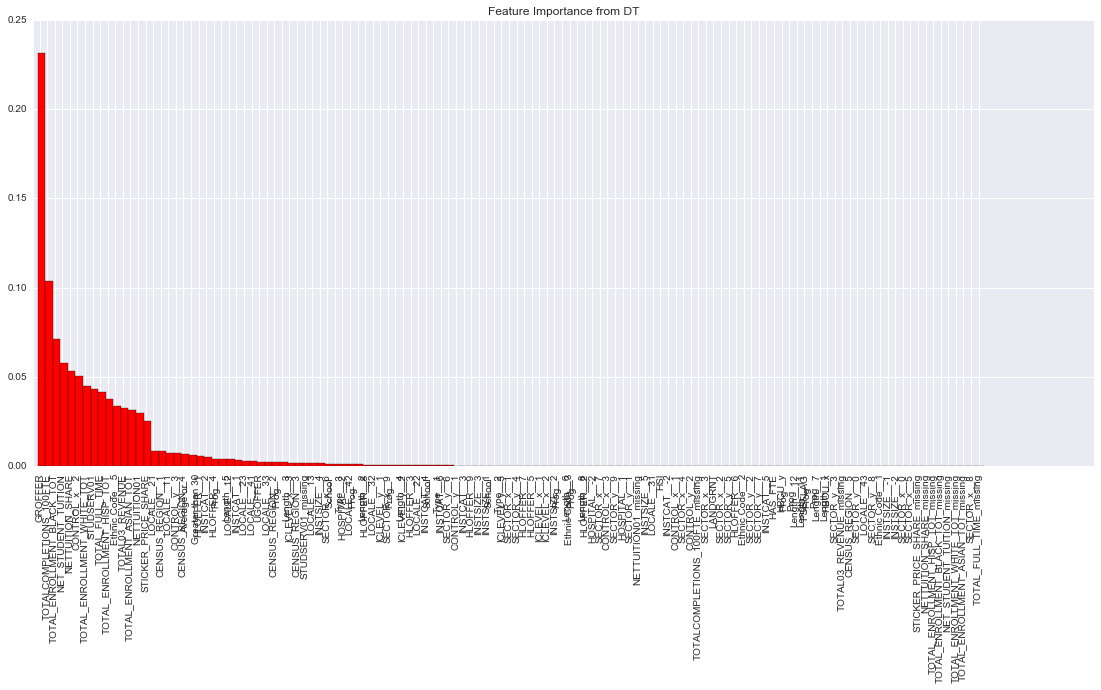

In [5]:
# Feature importance for Decision Tree Regressor
# NOTE: we really have to play with the X-Tick distances and bar widths....

# Sort our classifier's feature importance vector
indices_decisionTree = np.argsort(decisionTree.feature_importances_)[::-1]

# Plot our features in order of importance to our decision tree regressor
fig = plt.figure(figsize=(19,8))
ax = plt.subplot(111)
width = 1
ax.bar(.5 + np.arange(len(decisionTree.feature_importances_)), sorted(decisionTree.feature_importances_, reverse = True), width, color = 'r')
ax.set_xticks(.75 + np.arange(len(decisionTree.feature_importances_)))
ax.set_xticklabels([train_X.columns[i] for i in indices_decisionTree], rotation = 90)
plt.title('Feature Importance from DT')
plt.savefig("feature_importance.png")

In [6]:
# So! These are the Most important features. The first 15 are the most important and the importance appears to
# drop off after that...

[train_X.columns[i] for i in indices_decisionTree]

['GROFFER',
 'TOTALCOMPLETIONS_100FTE',
 'TOTAL_ENROLLMENT_BLACK_TOT',
 'NET_STUDENT_TUITION',
 'NETTUITION_SHARE',
 'CONTROL_x__2',
 'TOTAL_ENROLLMENT_WHITE_TOT',
 'STUDSERV01',
 'TOTAL_FULL_TIME',
 'TOTAL_ENROLLMENT_HISP_TOT',
 'Ethnic Code__5',
 'TOTAL03_REVENUE',
 'TOTAL_ENROLLMENT_ASIAN_TOT',
 'NETTUITION01',
 'STICKER_PRICE_SHARE',
 'LOCALE__21',
 'CENSUS_REGION__1',
 'LOCALE__11',
 'CONTROL_y__3',
 'CENSUS_REGION__4',
 'Average or\nGreater than 30',
 'HLOFFER__1',
 'INSTCAT__2',
 'HLOFFER__4',
 'Prog\nLength__5',
 'LOCALE__12',
 'INSTCAT__1',
 'LOCALE__23',
 'LOCALE__41',
 'UGOFFER',
 'LOCALE__33',
 'CENSUS_REGION__2',
 'Prog\nLength__3',
 'ICLEVEL_x__3',
 'CENSUS_REGION__3',
 'STUDSERV01_missing',
 'LOCALE__13',
 'INSTSIZE__4',
 'SECTOR_x__6',
 'School\nType__3',
 'HOSPITAL__2',
 'LOCALE__42',
 'Prog\nLength__2',
 'HLOFFER__8',
 'LOCALE__32',
 'ICLEVEL_y__1',
 'SECTOR_x__9',
 'Prog\nLength__4',
 'ICLEVEL_y__2',
 'HLOFFER__3',
 'LOCALE__22',
 'INSTCAT__4',
 'School\nType__1',
 '

In [7]:
[train_X.columns[i] for i in indices_decisionTree][:15]

['GROFFER',
 'TOTALCOMPLETIONS_100FTE',
 'TOTAL_ENROLLMENT_BLACK_TOT',
 'NET_STUDENT_TUITION',
 'NETTUITION_SHARE',
 'CONTROL_x__2',
 'TOTAL_ENROLLMENT_WHITE_TOT',
 'STUDSERV01',
 'TOTAL_FULL_TIME',
 'TOTAL_ENROLLMENT_HISP_TOT',
 'Ethnic Code__5',
 'TOTAL03_REVENUE',
 'TOTAL_ENROLLMENT_ASIAN_TOT',
 'NETTUITION01',
 'STICKER_PRICE_SHARE']

### Notes: 

It seems that the institution offering Graduate Programs is by far the leading indicator in reducing MSE of the Default Rates. If a school does not offer grad programs, then the value is 2.

Additionally, it is very interesting that the second impactful feature was Total Enrollment of Black students... Especially considering that in nearly every test we did not find HBCUs to be important at all! Makes a really solid case for HBCUs...

Sticker price is on there, so that's interesting. 

Control_x_2 is defined as schools that are private non-profit institutions

Ethnic Code_5 is defined as schools that did not report an ethnic code (this makes up a lot of the data... Not an HBCU or any other affiliation)


In [60]:
indices_decisionTree = np.argsort(decisionTree.feature_importances_)[::-1]
importance_decisionTree = {train_X.columns[i]: i for i in indices_decisionTree}
importance_decisionTree

{'Average or\nGreater than 30': 5,
 'CENSUS_REGION__1': 33,
 'CENSUS_REGION__2': 34,
 'CENSUS_REGION__3': 35,
 'CENSUS_REGION__4': 36,
 'CENSUS_REGION__5': 37,
 'CONTROL_x__1': 119,
 'CONTROL_x__2': 120,
 'CONTROL_x__3': 121,
 'CONTROL_y__1': 122,
 'CONTROL_y__2': 123,
 'CONTROL_y__3': 124,
 'Ethnic Code__1': 60,
 'Ethnic Code__2': 61,
 'Ethnic Code__3': 62,
 'Ethnic Code__5': 63,
 'GROFFER': 0,
 'HAS_FTE': 8,
 'HBCU_x': 1,
 'HBCU_y': 6,
 'HLOFFER__1': 97,
 'HLOFFER__2': 98,
 'HLOFFER__3': 99,
 'HLOFFER__4': 100,
 'HLOFFER__5': 101,
 'HLOFFER__6': 102,
 'HLOFFER__7': 103,
 'HLOFFER__8': 104,
 'HLOFFER__9': 105,
 'HOSPITAL__-2': 94,
 'HOSPITAL__1': 95,
 'HOSPITAL__2': 96,
 'HSI': 7,
 'ICLEVEL_x__1': 113,
 'ICLEVEL_x__2': 114,
 'ICLEVEL_x__3': 115,
 'ICLEVEL_y__1': 116,
 'ICLEVEL_y__2': 117,
 'ICLEVEL_y__3': 118,
 'INSTCAT__-2': 77,
 'INSTCAT__1': 78,
 'INSTCAT__2': 79,
 'INSTCAT__3': 80,
 'INSTCAT__4': 81,
 'INSTCAT__5': 82,
 'INSTCAT__6': 83,
 'INSTSIZE__-1': 107,
 'INSTSIZE__-2': 106,

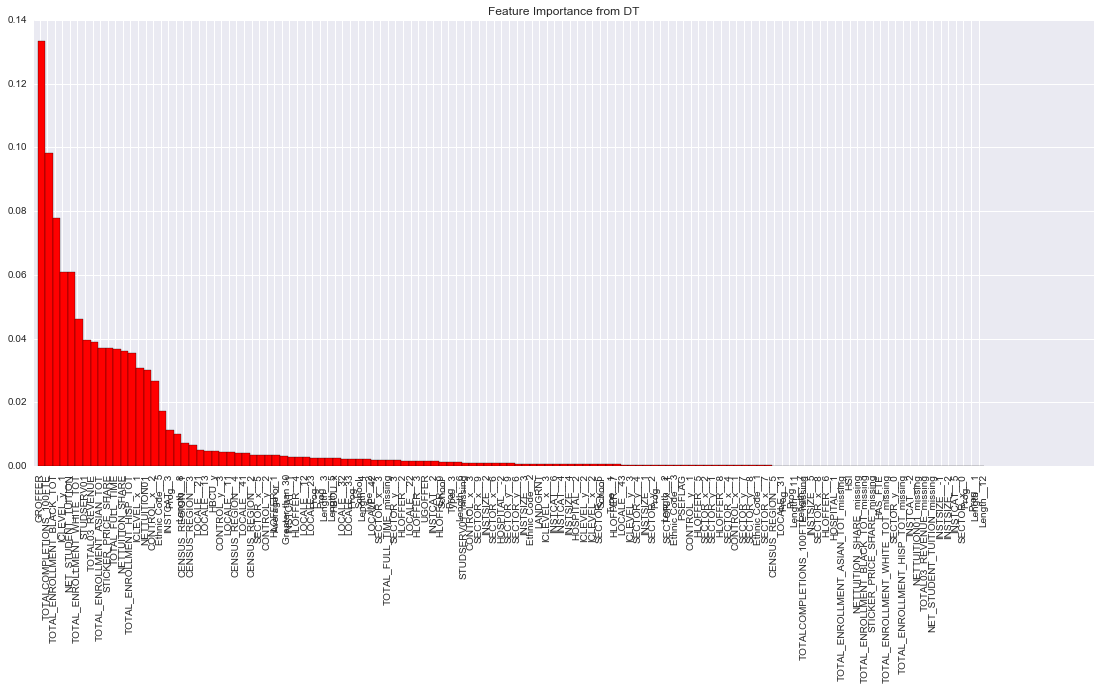

In [9]:
# Feature importance for Random Forrest Regressor
# NOTE: we really have to play with the X-Tick distances and bar widths....

# Sort our classifier's feature importance vector
indices_rfr = np.argsort(rfr.feature_importances_)[::-1]

# Plot our features in order of importance to our decision tree regressor
fig = plt.figure(figsize=(19,8))
ax = plt.subplot(111)
width = 1
ax.bar(.5 + np.arange(len(rfr.feature_importances_)), sorted(rfr.feature_importances_, reverse = True), width, color = 'r')
ax.set_xticks(.75 + np.arange(len(rfr.feature_importances_)))
ax.set_xticklabels([train_X.columns[i] for i in indices_rfr], rotation = 90)
plt.title('Feature Importance from DT')
plt.savefig("feature_importance.png")

In [61]:
indices_rfr = np.argsort(rfr.feature_importances_)[::-1]
importance_rfr = {train_X.columns[i]: i for i in indices_rfr}
importance_rfr

{'Average or\nGreater than 30': 5,
 'CENSUS_REGION__1': 33,
 'CENSUS_REGION__2': 34,
 'CENSUS_REGION__3': 35,
 'CENSUS_REGION__4': 36,
 'CENSUS_REGION__5': 37,
 'CONTROL_x__1': 119,
 'CONTROL_x__2': 120,
 'CONTROL_x__3': 121,
 'CONTROL_y__1': 122,
 'CONTROL_y__2': 123,
 'CONTROL_y__3': 124,
 'Ethnic Code__1': 60,
 'Ethnic Code__2': 61,
 'Ethnic Code__3': 62,
 'Ethnic Code__5': 63,
 'GROFFER': 0,
 'HAS_FTE': 8,
 'HBCU_x': 1,
 'HBCU_y': 6,
 'HLOFFER__1': 97,
 'HLOFFER__2': 98,
 'HLOFFER__3': 99,
 'HLOFFER__4': 100,
 'HLOFFER__5': 101,
 'HLOFFER__6': 102,
 'HLOFFER__7': 103,
 'HLOFFER__8': 104,
 'HLOFFER__9': 105,
 'HOSPITAL__-2': 94,
 'HOSPITAL__1': 95,
 'HOSPITAL__2': 96,
 'HSI': 7,
 'ICLEVEL_x__1': 113,
 'ICLEVEL_x__2': 114,
 'ICLEVEL_x__3': 115,
 'ICLEVEL_y__1': 116,
 'ICLEVEL_y__2': 117,
 'ICLEVEL_y__3': 118,
 'INSTCAT__-2': 77,
 'INSTCAT__1': 78,
 'INSTCAT__2': 79,
 'INSTCAT__3': 80,
 'INSTCAT__4': 81,
 'INSTCAT__5': 82,
 'INSTCAT__6': 83,
 'INSTSIZE__-1': 107,
 'INSTSIZE__-2': 106,

In [39]:
# Take a look at the top 18:

top_18 = [train_X.columns[i] for i in indices_rfr][:18]
top_18

['GROFFER',
 'TOTALCOMPLETIONS_100FTE',
 'TOTAL_ENROLLMENT_BLACK_TOT',
 'ICLEVEL_y__1',
 'NET_STUDENT_TUITION',
 'TOTAL_ENROLLMENT_WHITE_TOT',
 'STUDSERV01',
 'TOTAL03_REVENUE',
 'TOTAL_ENROLLMENT_ASIAN_TOT',
 'STICKER_PRICE_SHARE',
 'TOTAL_FULL_TIME',
 'NETTUITION_SHARE',
 'TOTAL_ENROLLMENT_HISP_TOT',
 'ICLEVEL_x__1',
 'NETTUITION01',
 'CONTROL_x__2',
 'Ethnic Code__5',
 'INSTCAT__3']

### Notes:

**Some different results!**

Schools that offer Grad Programs have lower Default Rates

Completions went up, ICILevel shot way up, Total Revenue too, and so did Enrollment of White.

Control shot down significantly!

These features that are important seem to overlap with the regular decision tree, but this model seems to benefit 
from all of the random sampling (bagging).

ICILevel_y_1 is defined as an institution that is a four year college!

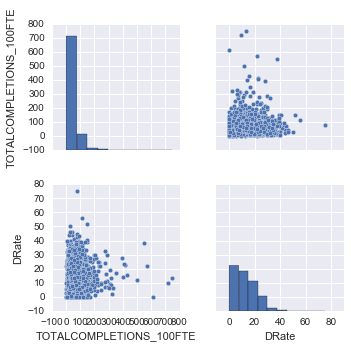

In [12]:
sns.pairplot(data_2011[['TOTALCOMPLETIONS_100FTE','DRate']])

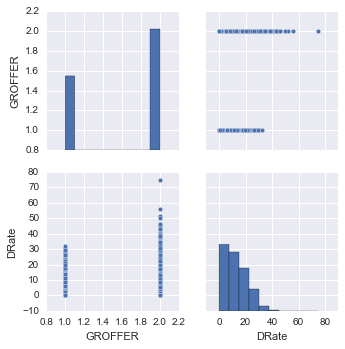

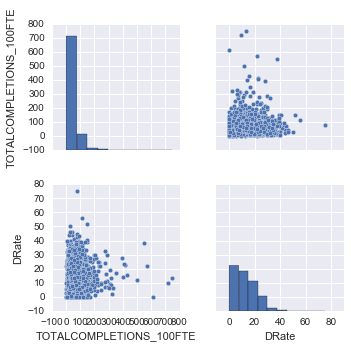

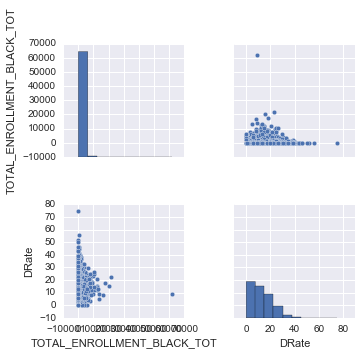

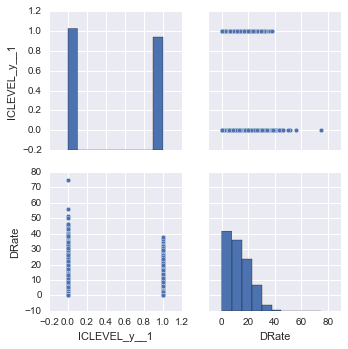

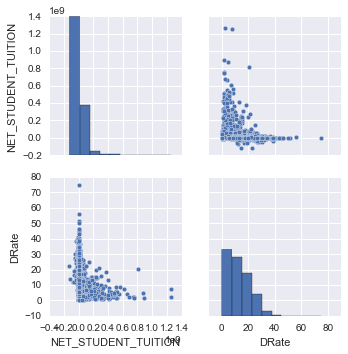

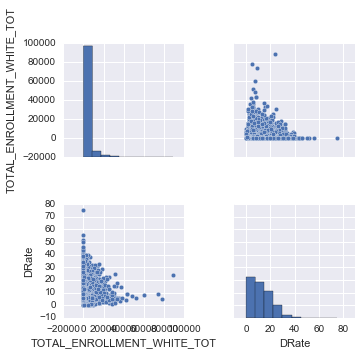

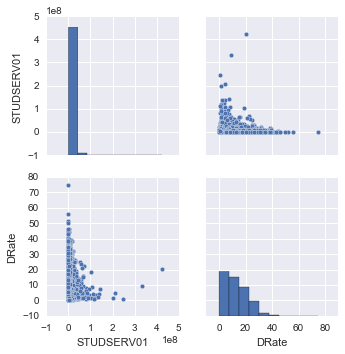

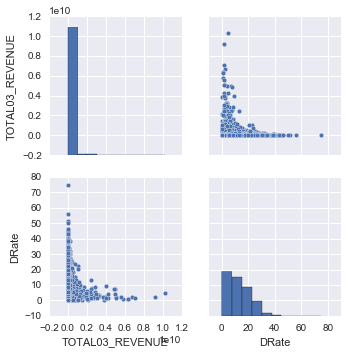

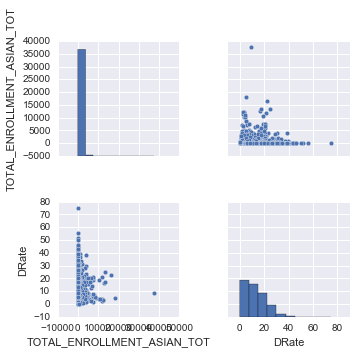

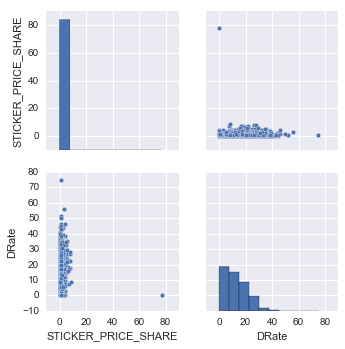

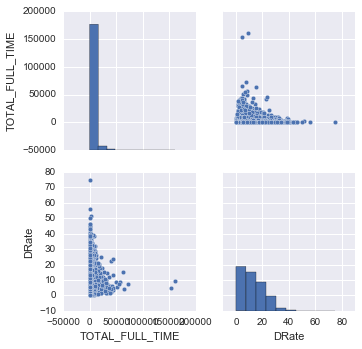

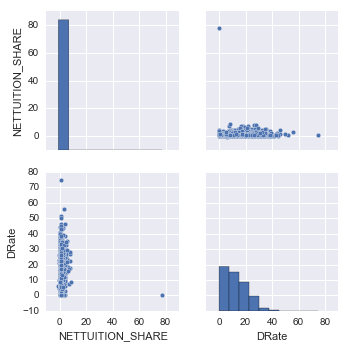

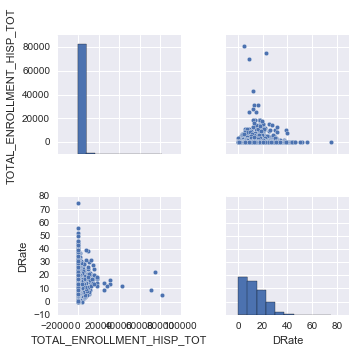

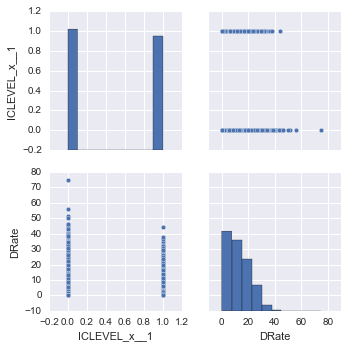

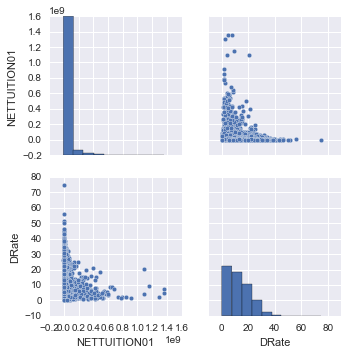

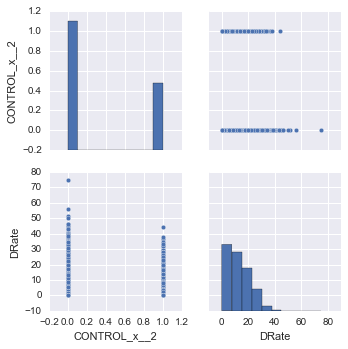

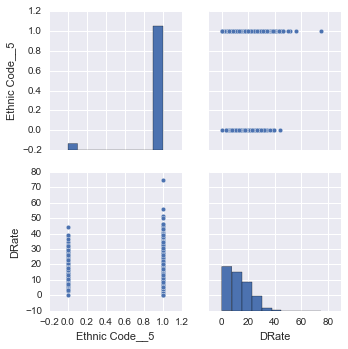

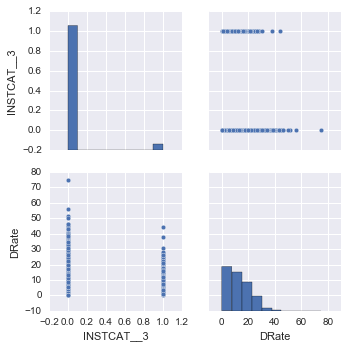

In [13]:
# Plotting pair-wise plots for each feature that we indicated had large importance to see what the data looks like!

for feature in top_18:
    sns.pairplot(data_2011[[feature,'DRate']])

In [24]:
zero_DRate = data_2011[data_2011['DRate']==0]
np.mean(zero_DRate.STICKER_PRICE_SHARE)

1.3479447366455362

In [26]:
high_DRate = data_2011[data_2011['DRate']>10]
np.mean(high_DRate.STICKER_PRICE_SHARE)

1.013326444501593

#### Random note above ^ there is an inverse relationship between burden of StickerPrice and Default Rates

#### Also, the mean was imputed to be over 100%... Unclear as to what over 100% of share of education and related expenses that are covered by gross tuition revenue

In [40]:
top_18 = top_18+['DRate']

In [45]:
corr_matrix = data_2011[top_18].corr()[-1:]
corr_matrix.transpose()

,DRate
GROFFER,0.483558
TOTALCOMPLETIONS_100FTE,0.103107
TOTAL_ENROLLMENT_BLACK_TOT,0.045287
ICLEVEL_y__1,-0.480295
NET_STUDENT_TUITION,-0.242946
TOTAL_ENROLLMENT_WHITE_TOT,-0.078089
STUDSERV01,-0.161005
TOTAL03_REVENUE,-0.174075
TOTAL_ENROLLMENT_ASIAN_TOT,-0.057892
STICKER_PRICE_SHARE,-0.005018


In [ ]:
# Fancy heatmap!

cmap = sns.diverging_palette(220, 10, as_cmap=True)

corr_matrix = data_2011[top_18].corr()
sns.heatmap(corr_matrix, cmap=cmap)

#### Leading into our next model (/if we would like to move forward with a more basic linear model) this gives some insight to correlations

In [5]:
# Attempt at SVD:

U, sig, Vt = np.linalg.svd(data_2011)

#Plot the spectrum of the image and the total sum-squares captured by the k-th value

norm = math.sqrt(sum(sig*sig))
energy_k = [math.sqrt(k)/norm for k in math.cumsum(sig*sig)]

plt.figure()
ax1 = plt.subplot(211)
plt.plot(sig)
plt.title('Kth Singular Value')
plt.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')


ax2 = plt.subplot(212)
plt.plot(energy_k)
plt.title('Normalized Cumulative Energy of Kth Singular Value')

ax2.set_xlabel('Kth Singular Value')

AttributeError: 'module' object has no attribute 'cumsum'

In [ ]:
## OTHER LAST MINUTE THING! LOG-Transform of DRate maybe?
# data_20ll['DRate'] = np.log10(data_2011['DRate']+1)